## Question 4 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [23]:
# Import packages and load data
X_and_Y = np.load('./q3-least-square.npy')
X = X_and_Y[:, 0]  # Shape: (300,)
Y = X_and_Y[:, 1]  # Shape: (300,)
print(X.shape)
print(Y.shape)

(300,)
(300,)


### 2.1: 2D Scatterplot

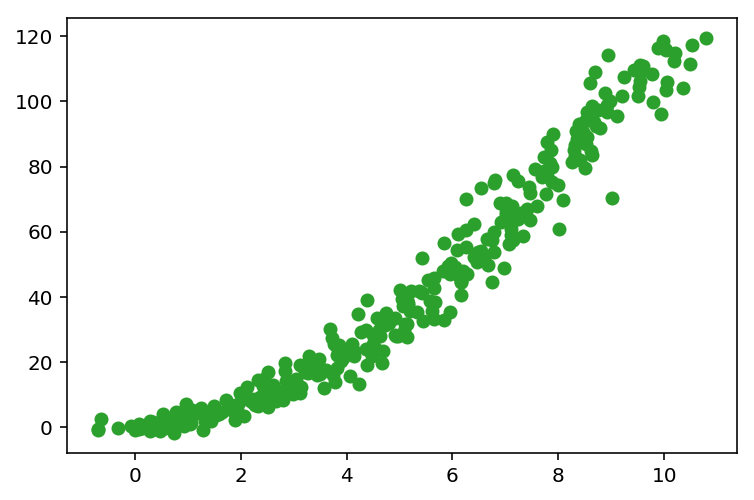

In [24]:
# TODO 1: Plot the a scatter graph of data.
plt.scatter(X, Y)
plt.show()

### 2.2: Compute the Least Sequare Line Using the Closed Form 

In [59]:
# TODO 2: Compute the least square line over the given data
# Assume Y = w0 + w1 * X = (w0, w1).(1, X) = W.X1
# You might find the following functions useful: np.matrix, np.hstack, np.ones, np.reshape, dot
# Example: make a numpy matrix. https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.html
# Example: stack arrays horizontally. https://docs.scipy.org/doc/numpy/reference/generated/numpy.hstack.html
# Example: create a new array filled with ones https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones.html
# Example: reshape array without changing data https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html
# Example: A*B. Dot product of two arrays https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html

XNew = X.T
a = np.ones(XNew.shape[0])
XNew = np.vstack((a, XNew))
XNew = XNew.T

W = (np.linalg.inv(XNew.T.dot(XNew)).dot(XNew.T)).dot(Y)
w0 = W[0]
w1 = W[1]
print('Y = {:.2f} + {:.2f}*X'.format(w0, w1))

Y = -15.47 + 11.61*X


### 2.3: 2D Scatterplot & the Estimated Least Square Line

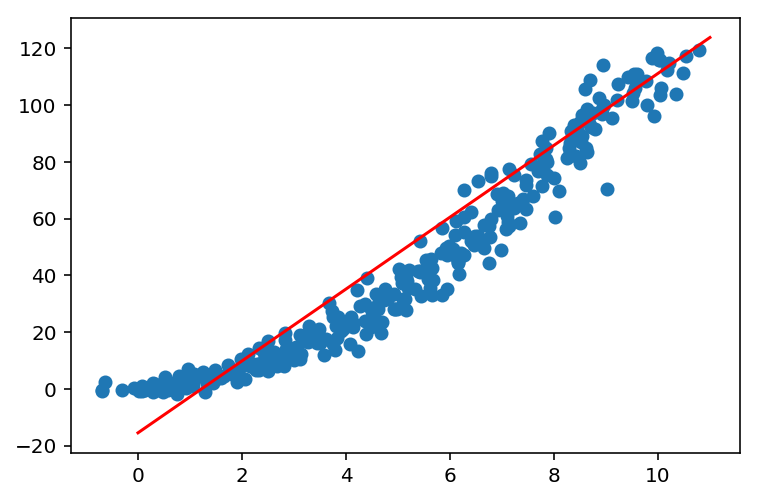

In [60]:
# TODO 3.  Plot the the estimated least square line on top of the scatter plot in (2).  
# The scatterplot and the line should be in the same figure.
plt.scatter(X, Y)
x = np.linspace(0,12,12)
y = w0 + w1 * x
plt.plot(y, color='r')
plt.show()

### 2.4: Compute the Least Square Parabola Using the Closed Form

In [61]:
# TODO 4. Compute the least square parabola over the given data
# Assume Y = w0 + w1 * X + w2 * X^2 = (w0, w1, w2).(1, X, X^2) = W.X2

X2 = np.vstack((XNew.T, X ** 2)).T
W = (np.linalg.inv(X2.T.dot(X2)).dot(X2.T)).dot(Y)
w0 = W[0]
w1 = W[1]
w2 = W[2]
print('Y = {:.2f} + {:.2f}*X + {:.2f}*X^2'.format(w0, w1, w2))

Y = -1.71 + 3.02*X + 0.87*X^2


### 2.5: 2D Scatterplot & the Estimated Parabola

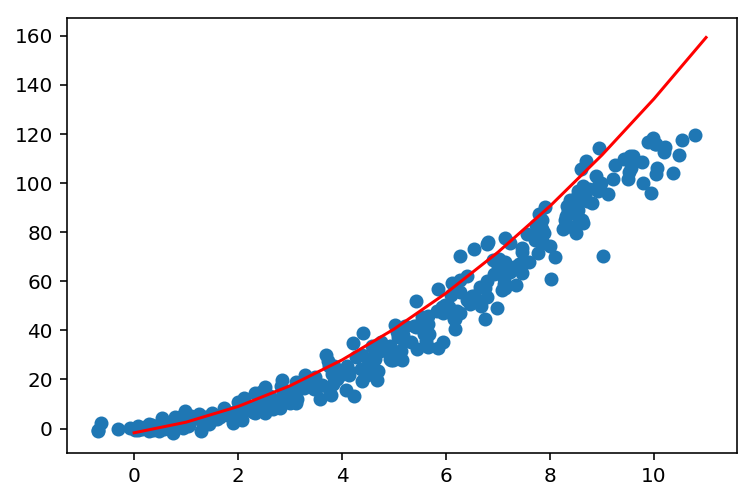

In [62]:
# TODO 5.  Plot the the estimated parabola on top of the scatter plot in (2). 
# The scatterplotand the parabola should be in the same figure
plt.scatter(X, Y)
x = np.linspace(0,12,12)
y = w0 + w1 * x + w2 * (x ** 2)
plt.plot(y, color='r')
plt.show()

## Question 5 and 6 

In this problem, we will perform a binary classification task on the Iris dataset. This dataset has 150 data points, where each data point $\mathbf{x} \in \mathbb{R}^4$ has 4 features and its corresponding label $y \in \{0, 1\}$.

(In fact, the original Iris dataset has 3 classes: 0 for Setosa, 1 for Versicolor and 2 for Virginica. Here for binary classification task, we combine Setosa and Versicolor together as $y = 0$ and label Virginca as $y = 1$)

To classify these 2 labels above, we decide to utilize a decision stump. The decision stump works as follows (for simplicity, we restrict our attention to uni-directional decision stumps):

- Given the $j$-th feature $\mathbf{x}(j)$ and a threshold $Th$, for each data point with index $i$, the classification function is defined by $y=f(\mathbf{x}, j, Th)$ as:
$$
f({\bf x}, j, Th)=
\begin{cases}
1 & if \; {\bf x}(j) > Th \\
0 & otherwise 
\end{cases} 
$$

      
Based on the decision stump above, we wish to use an algorithm to find the 
**best feature** and **best threshold** on training set to create a "best" decision stump, in a sense that such decision stump can achieve the **highest accuracy on training set**:

- Loop over $j$-th feature $\mathbf{x}(j)$ ($j$ = 0, 1, 2, 3).
   - Loop over all possible threshold $Th$ between the minimum and maximum of $\mathbf{x}(j)$.
       1. For each data point $\mathbf{x}(j)$ with data point index $i$ $(i=0,\ldots,99)$ (the first 100 points for training set), predict:
               
       $$ y \Rightarrow 0 \text{ if } \mathbf{x}(j) \leq Th, \quad\quad y \Rightarrow 1 \text{ if } \mathbf{x}(j) > Th$$
           
       2. Calculate the accuracy over the training set. 

       
- Output feature index $j$ and threshold $Th$, which achieves the best accuracy.
                      

Please fill the function **calc_acc(Xj, Y, thres)** in Find the best feature and best threshold*.

The first histogram printed should be like:
<img src='./sample-result.png' width=300 />

If you use the PDF of this notebook, just fill the function, run the whole notebook and save all contents here. Otherwise, if you want to create a separate document, please include:

- All 4 histograms in last part of the code.
- The best feature, best threshold, training and test accuracy in last part of the code.

In [10]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

### Load the Iris dataset

In [11]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = 0 (or False):  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 (or True):   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y[i] = False (which is equivalent to 0) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y = (iris.target > 1.5).reshape(-1,1) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               # The result should be always: [ 5.8  4.   1.2  0.2  0. ]

(150, 4)
(150, 1)
[5.8 4.  1.2 0.2 0. ]


In [12]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]

X_train = X_shuffled[:100] # Shape: (100,4)
Y_train = Y_shuffled[:100] # Shape: (100,)
X_test = X_shuffled[100:]  # Shape: (50,4)
Y_test = Y_shuffled[100:]  # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


### Draw the histograms of each feature

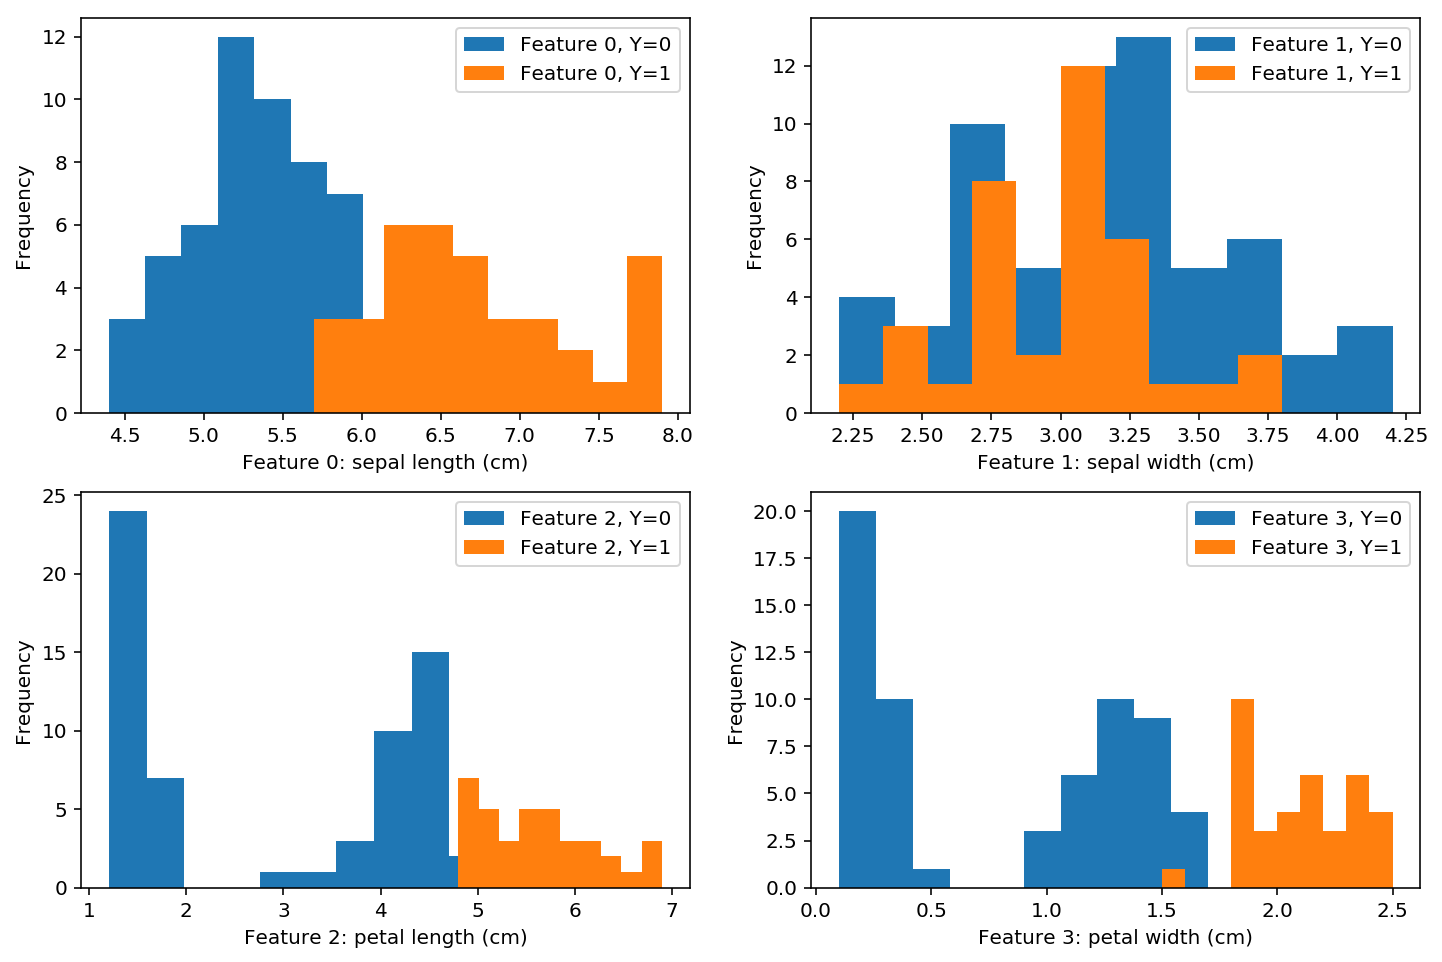

In [13]:
# Show the histograms of each feature.
plt.figure(figsize=(12,8))
for j in range(4):
    Xj_train = X_train[:,j]
    Xj_when_Y0_train = [Xj_train[i] for i in range(len(Xj_train)) if Y_train[i] == 0]
    Xj_when_Y1_train = [Xj_train[i] for i in range(len(Xj_train)) if Y_train[i] == 1]

    plt.subplot(2, 2, j+1)
    plt.hist(Xj_when_Y0_train, label='Feature {}, Y=0'.format(j))
    plt.hist(Xj_when_Y1_train, label='Feature {}, Y=1'.format(j))
    plt.xlabel('Feature {}: {}'.format(j, iris.feature_names[j]))
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

### Problem 5: Training vs. Testing Errors

In [44]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score

# Pre-defined W is given
reg = LinearRegression().fit(X_train, Y_train)
print(reg.coef_)
print(reg.intercept_)

def regression (x,y):
    w = reg.coef_
    b = reg.intercept_
    reg_diff = 0
    # TODO: ******** To be filled ********
    # Hint: use a for loop loop through x, and make prediction. 
    # Then, you can compare your prediction with y to calculate error rate

    ypred = np.zeros(y.shape)
    for i in range(len(y)):
        ypred[i] = w.T.dot(x[i]) + b

    loss = 0
    for i in range(len(ypred)):
        loss += (ypred[i] - y[i]) ** 2
    loss /= len(x)
    reg_diff = loss ** .5
    return reg_diff
    
def classification (x,y):
    w = reg.coef_
    b = reg.intercept_
    clss_diff = 0
    # TODO: ******** To be filled ********
    # Hint: use a for loop loop through x, and make prediction. 
    # Then, you can compare your prediction with y to calculate error rate
    
    ypred = np.zeros(y.shape)
    h = np.zeros(y.shape)
    for i in range(len(x)):
        ypred[i] = w.T.dot(x[i]) + b
        if(ypred[i] >= .5):
            h[i] = 1
        if(h[i] != y[i]):
            clss_diff += 1
    
    clss_diff /= len(x)
    return clss_diff
        
    
    

print('Training regression and classification errors are:')
print(regression(X_train, Y_train))
print(classification(X_train, Y_train))
print('Testing regression and classification errors are:')
print(regression(X_test, Y_test))
print(classification(X_test, Y_test))


[ 0.12975624  0.12249935 -0.11714156  0.67102651]
-1.1698768088050127
Training regression and classification errors are:
0.27976412743241214
0.06
Testing regression and classification errors are:
0.33100713441395574
0.14


### Problem 6: Find the best feature and best threshold

In [41]:
# Calculate the accuracy of prediction given feature, target and threshold.
def calc_acc(Xj, Y, thres):
    """
    Calculate the accuracy given feature, target and threshold.
        Xj:    j-th feature. This array only contains 1 feature for all data points, 
               so the shape should be (count of data points,)
        Y:     Target array. Shape: (count of data points,)
        thres: Threshold.
    Return the accuracy of prediction.
    """
    # Step 1. Count the number of correct predictions and incorrect predictions.
    #         Here, for simplicity, we assume:
    #              If feature <= threshold, we predict it as Y = 0.
    #              If feature  > threshold, we predict it as Y = 1.
    n_correct = 0
    n_incorrect = 0
    
    f = np.zeros(Y.shape)
    index = 0
    for i,j in zip(Xj,Y):
         # TODO: ******** To be filled ********
         # Check if result is above threshold
         # and then check if prediction is correct or incorrect
        if(i > thres):
            f[index] = 1
        if(f[index] == j):
            n_correct = n_correct + 1
        else:
            n_incorrect = n_incorrect + 1
        index = index + 1
        
        
        
    # Step 2. Calculate the accuracy.
    acc = 1.0 * n_correct / (n_correct + n_incorrect)
    
    return acc

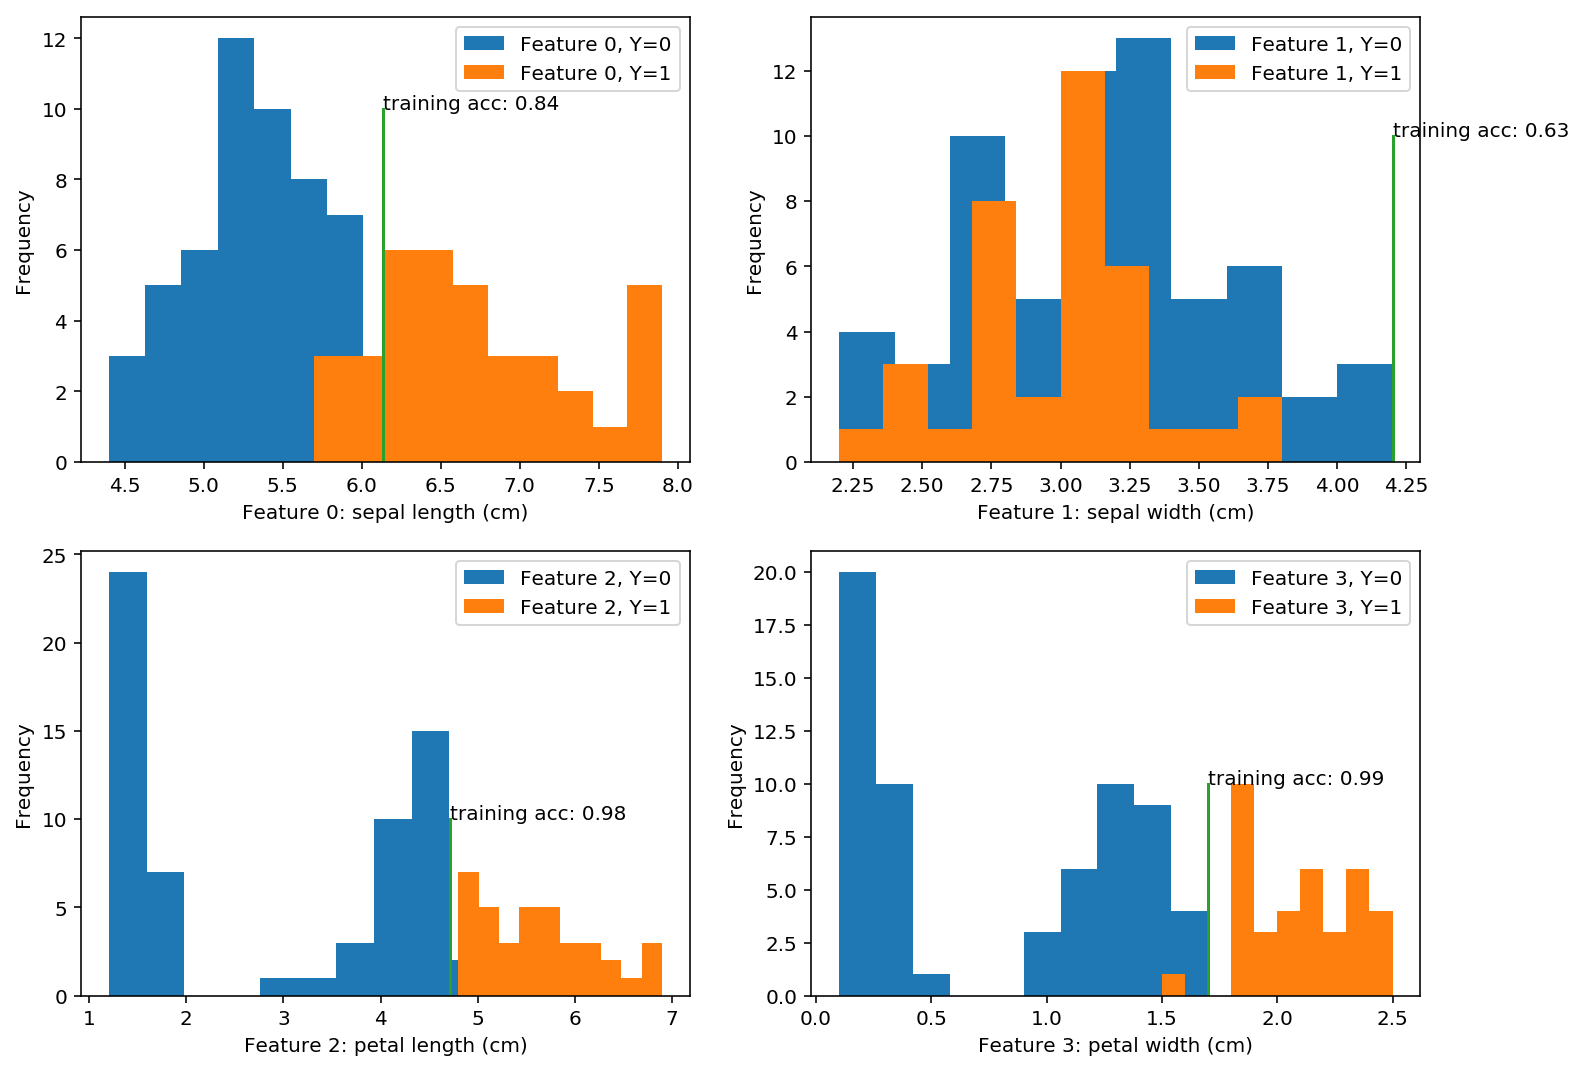

In [42]:
# Show the histograms of each feature.
plt.figure(figsize=(12,9))

all_max_acc = 0.0  # Max training accuracy among all features.
all_thres   = None # Threshold when reach the max training accuracy.
all_feature = None # Index of feature when reach the max training accuracy.

# Loop over 4 features. j: index of current feature.
for j in range(4):
    # Get data.
    Xj_train = X_train[:,j] # Array of feature j. 
    Xj_when_Y0_train = [Xj_train[i] for i in range(len(Xj_train)) if Y_train[i] == 0] # Array of feature j when Y = 0.
    Xj_when_Y1_train = [Xj_train[i] for i in range(len(Xj_train)) if Y_train[i] == 1] # Array of feature j when Y = 1.

    current_max_acc = 0.0    # Max training accuracy in current feature.
    current_thres   = None   # Threshold when reach the max accuracy in current feature.
    
    # Loop over all possible values for threshold. Here we consider 100 numbers between min and max of current feature.
    for thres in np.linspace(Xj_train.min(), Xj_train.max(), 100):
        # Calculate the accuracy on training data given feature, target and threshold.
        acc = calc_acc(Xj_train, Y_train, thres)
        # Update the current max accuracy if possible.
        if acc > current_max_acc:
            current_max_acc = acc
            current_thres = thres
    
    # Update the max training accuracy among all features if possible.
    if current_max_acc > all_max_acc:
        all_max_acc = current_max_acc
        all_thres   = current_thres
        all_feature = j
            
    # Plot the histograms and the best decision stump in current feature.
    plt.subplot(2, 2, j+1)
    plt.hist(Xj_when_Y0_train, label='Feature {}, Y=0'.format(j))
    plt.hist(Xj_when_Y1_train, label='Feature {}, Y=1'.format(j))
    plt.plot([current_thres, current_thres], [0, 10])
    plt.text(current_thres, 10, 'training acc: {}'.format(current_max_acc))
    plt.xlabel('Feature {}: {}'.format(j, iris.feature_names[j]))
    plt.ylabel('Frequency')
    plt.legend()
plt.show()

In [43]:
# Use the best feature and best threshold on test set.

Xj_test = X_test[:, all_feature] # Array of best feature. 
test_acc = calc_acc(Xj_test, Y_test, all_thres)
print('Best feature: {}'.format(all_feature))
print('Best threshold: {:.2f}'.format(all_thres))
print('Training accuracy of best feature: {:.2f}'.format(all_max_acc))
print('Test accuracy of best feature: {:.2f}'.format(test_acc))

Best feature: 3
Best threshold: 1.70
Training accuracy of best feature: 0.99
Test accuracy of best feature: 0.90
